# Conceptual Functioning

## From cadCAD repo:

> cadCAD: a **differential games** based simulation software package for research, validation, and Computer Aided Design of economic systems

- **Differential Games**:

 > "Differential games are related closely with optimal control problems. In an optimal control problem there is single control and a single criterion to be optimized; differential game theory generalizes this to two controls and two criteria, one for each player.[3] Each player attempts to control the state of the system so as to achieve its goal; the system responds to the inputs of all players." (Wikipedia)


> "cadCAD can simulate any system that can be described as *state variables* that evolve over time according to a set of equations"

>"An economic system is treated as a **state-based** model and defined through a set of **endogenous and exogenous state variables** which are updated through **mechanisms and environmental processes**, respectively. **Behavioral models**, which may be deterministic or stochastic, provide the evolution of the system within the **action space of the mechanisms**. Mathematical formulations of these economic games treat **agent utility** as derived from the state rather than direct from an **action**, creating a rich, dynamic modeling framework.^

- **Personal take**:

    > "**Behavioral models** (stochastic or deterministic) inform **Mechanisms**, which update **state variables**, thus **Systems’s State**. **Agent utility** (?) derives from State (as opposed to **Action** (?)), through mathematical formulations."


> "Given a Simulation Configuration, cadCAD produces datasets that represent the evolution of the state of a system over discrete time. The state of the system is described by a set of State Variables. The dynamic of the system is described by Policy Functions and State Update Functions, which are evaluated by cadCAD according to the definitions set by the user in Partial State Update Blocks."

## From Telegram group

- Markus:

> "You can think about the **actions as the outputs of the policy functions**. They signal intent, but depending on the mechanisms and competing actions from other agents and other factors, they might not result in the state change the agent desired. And **what agents really care about (utility)** is the state of the system, and not the actions they took/take."


> "Agents are entities that interact with the system. **Behavioral models and policies contain the "logic" of the agents**: what state variables agents read, how they process those variables and what actions they take. In many cases it also makes sense to have internal system policies - the library does not inherently make a distinction between internal system policies and agents policies/behavioral models."

- Michael:

> "At least how i think about it it **utilities --inform--> behavoir models --inform--> agents actions**. Agents actions are a combined byproduct of the current system state and their behavior model (which is a kind of individual policy as opposed to system policy)"

> "in the case of 'system policies' as opposed to agents policies, the system can be thought of as having a utility or purpose as well, and the policy functions should be aligned to that goal."

## Lucid Chart - cadCAD simulation framework

![cadCAD%20-%20v0.2_Markus.png](cadCAD_diagram.png)
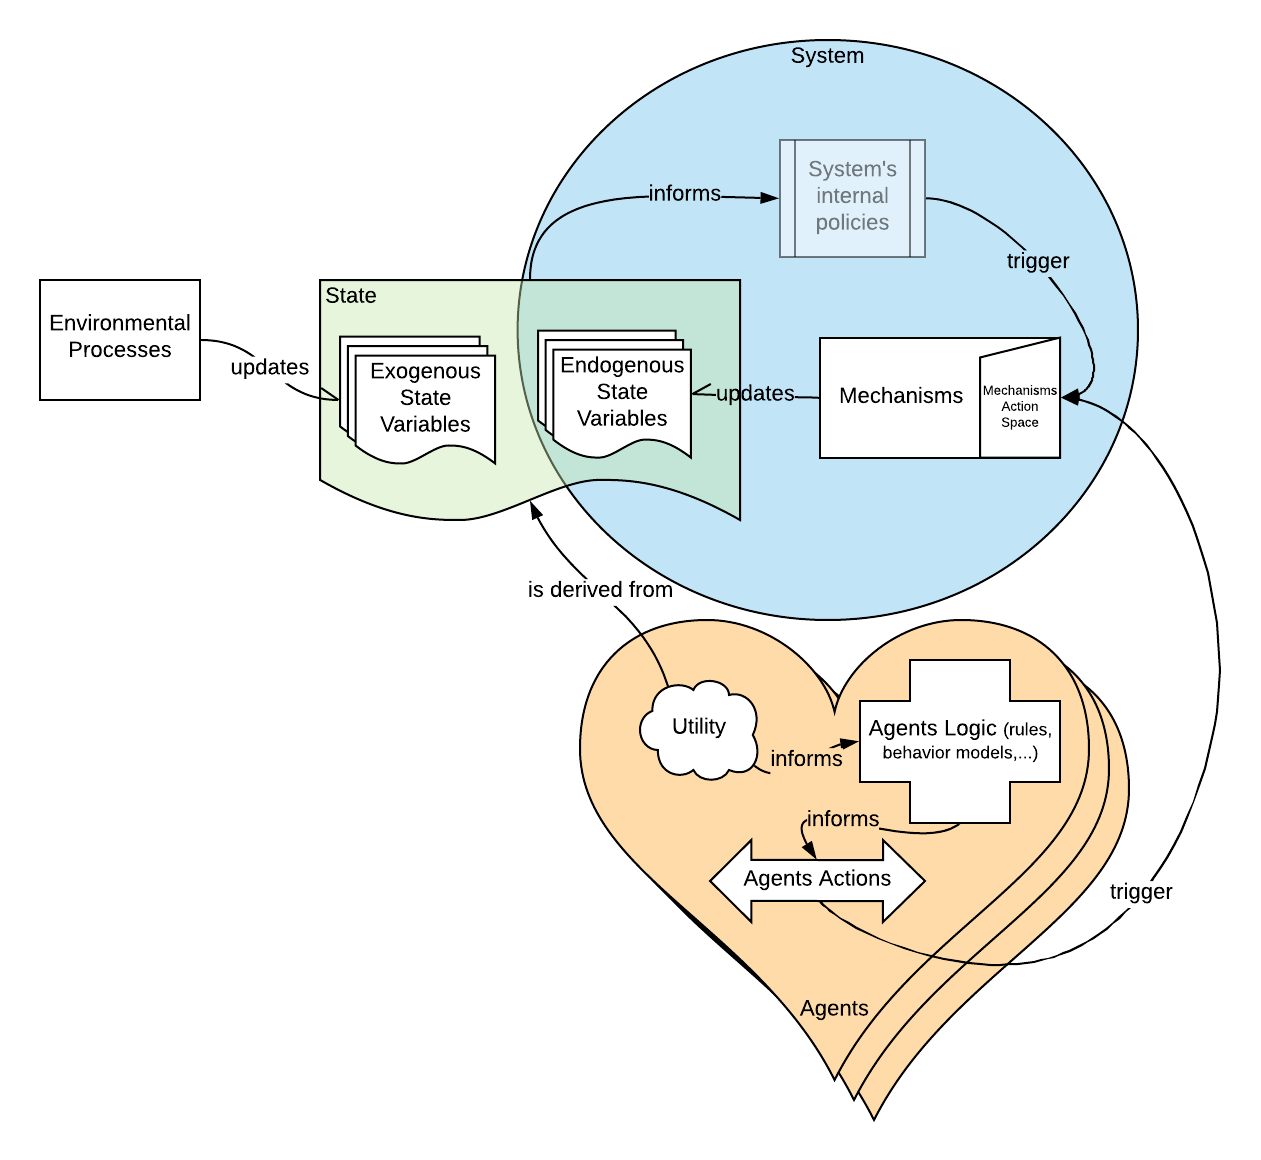

___

# Python Refreshment

### Python dictionaries
> A dictionary is a collection which is **unordered, changeable and indexed**. In Python dictionaries are written with curly brackets{}, and they have keys and values.

- cadCAD expects state variables to be passed to it as a Python dict where the dict_keys are the names of the variables and the dict_values are their initial values.

#### Examples:

In [47]:
#EX:
thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964,
  "color": "red"
}
print(thisdict["color"])

red


### Python tuples
> A tuple is a collection which is **ordered and unchangeable**. In Python tuples are written with round brackets().

- In cadCAD, each state update function must return a tuple containing the name of the state variable being updated and its new value.

#### Examples:

In [40]:
#EX:

thistuple = (x, 23)
print(thistuple)

(10, 23)


### Python lists

> A list is a collection which is **ordered and changeable**. In Python lists are written with square brackets[].

- cadCAD expects **partial state update blocks** to be specified as a _list of dicts_

#### Examples:

In [46]:
thislist = ["apple", "banana", "cherry"]
print(thislist)
print(thislist[0])

['apple', 'banana', 'cherry']
apple


In [57]:
## We refer to the groups of state update functions that
## are executed in parallel within a timestep as Partial
## State Update Blocks. cadCAD expects partial state update
## blocks to be specified as a list of dicts with the following structure:

psub = [
    #first block 
    { 
        'policies': {
            'policy1': 'policy_function_1',
            'policy2': 'policy_function_2',
        },
        'variables': {
            'variable1': 'state_update_function_1',
            'variable2': 'state_update_function_2',
        }
    }
    #secong block...
]

print (psub[0]["variables"]["variable2"])

state_update_function_2


---

# Monte Carlo Method

---

# Marbles and Robot - cadCAD Tutorial (Part 1)

### Systems State Variables

A state variable is one of the set of variables that are used to describe the mathematical "state" of a dynamical system. It is up to the user of cadCAD to determine the state variables needed to sufficiently accurately describe the system they are interested in.

In [134]:
# List of all the state variables in the system and their initial values
initial_conditions = {
    'box_A': 11, # as per the description of the example, box_A starts out with 10 marbles in it
    'box_B': 0 # as per the description of the example, box_B starts out empty
}

### State Update Functions

State Update Functions are Python functions that represent the equations according to which the state variables change over time. Each state update function must return a tuple containing the name of the state variable being updated and its new value. 

**Box A**

In [120]:
def update_A(params, steps, sL, s, _input):
    #local variables:
    y = 'box_A'
    add = 0
    
    #logic:
    if s['box_A'] > s['box_B']:
        add = -1
    elif s['box_A'] < s['box_B']:
        add = 1
    
    #output
    x = s['box_A'] + add
    return (y,x)

**Box B**

In [98]:
def update_B(params, steps, sL, s, _input):
    #local variables:
    y = 'box_B'
    add = 0
    
    #logic:
    if s['box_B'] > s['box_A']:
        add = -1
    elif s['box_B'] < s['box_A']:
        add = 1
    
    #output
    x = s['box_B'] + add
    return (y,x)

### Partial State Update Functions

In the Partial State Update Blocks, the user specifies if state update functions will be run in series (multiple blocks = multiple dictionaries in "partial_state_update_blocks" list) or in parallel (within same block = within same dictionary in "partial_state_update_blocks" list)

In the case of our robot and marbles example system, we can model the system so that all state update functions are executed in parallel (within the only dictionary within "partial_state_update_blocks" list). In other words, we consider the marbles move from one box to the other simultaneously (ie, box_A + box_B is constant)

In [99]:
partial_state_update_blocks = [
    { 
        'policies': { # We'll ignore policies for now
        },
        'variables': { # The following state variables will be updated simultaneously
            'box_A': update_A,
            'box_B': update_B
        }
    }
]

### Simulations Config Parameters

Settings of general simulation parameters, unrelated to the system itself `T` is a range with the number of discrete units of time the simulation will run for; `N` is the number of times the simulation will be run (Monte Carlo runs). In this example, we'll run the simulation once (N=1) and its duration will be of 10 timesteps. We'll cover the `M` key in a future article. For now, let's leave it empty

In [132]:
simulation_parameters = {
    'T': range(10),
    'N': 1,
    'M': {}
}

### Putting it all together

We have defined the state variables of our system and their initial conditions, as well as the state update functions, which have been grouped in a single state update block. We have also specified the parameters of the simulation (number of timesteps and runs). We are now ready to put all those pieces together in a **Configuration object** (seems to be the key to start the cadCAD engine, where we input all the data from the simulated system).

- Configuration function:

`Configuration(initial_state, partial_state_update_blocks, sim_config)`

In [133]:
from cadCAD.configuration import Configuration

## Creating config object with Configuration function
config = Configuration(initial_state=initial_conditions, #dict containing variable names and initial values
                       partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
                       sim_config=simulation_parameters #dict containing simulation parameters
                      )

### Running the engine

We are now ready to run the engine with the configuration defined above. Instantiate an ExecutionMode, an ExecutionContext and an Executor objects, passing the Configuration object to the latter. Then run the execute() method of the Executor object, which returns the results of the experiment in the first element of a tuple.

In [129]:
%%capture

from cadCAD.engine import ExecutionMode, ExecutionContext, Executor

exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.single_proc)
executor = Executor(exec_context, [config]) # Pass the configuration object inside an array
raw_result, tensor = executor.execute() # The `execute()` method returns a tuple; its first elements contains the raw results

## Analysing

In [130]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(raw_result)
df.set_index(['run', 'timestep', 'substep'])

box_A  box_B
run timestep substep              
1   0        0           12      0
    1        1           11      1
    2        1           10      2
    3        1            9      3
    4        1            8      4
    5        1            7      5
    6        1            6      6
    7        1            6      6
    8        1            6      6
    9        1            6      6
    10       1            6      6
    11       1            6      6
    12       1            6      6
    13       1            6      6
    14       1            6      6
    15       1            6      6
    16       1            6      6
    17       1            6      6
    18       1            6      6
    19       1            6      6
    20       1            6      6
    21       1            6      6
    22       1            6      6
    23       1            6      6
    24       1            6      6
    25       1            6      6
    26       1            6      6
    27       1            6      6
    28       1            6      6
    29       1            6      6
    30       1            6      6

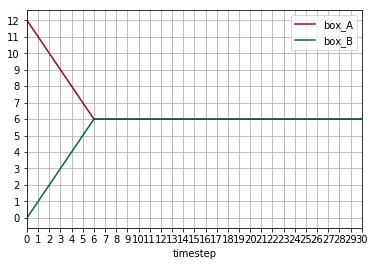

In [131]:
df.plot('timestep', ['box_A', 'box_B'], grid=True, 
        colormap = 'RdYlGn',
        xticks=list(df['timestep'].drop_duplicates()), 
        yticks=list(range(1+(df['box_A']+df['box_B']).max())));